# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 11__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Jaime Benedí Galdeano__

In [1]:
RANDOM_STATE = 11

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('heart_failure.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.





### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).



In [4]:
df_numericos = df.select_dtypes(include=['float64', 'int64'])

df_numericos.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


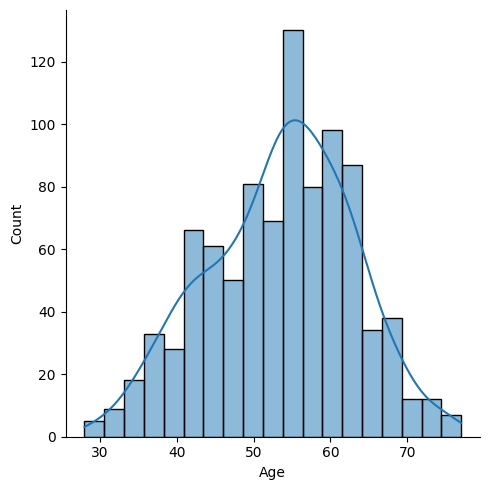

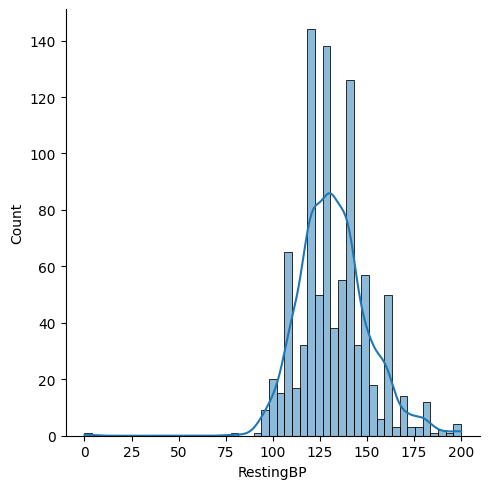

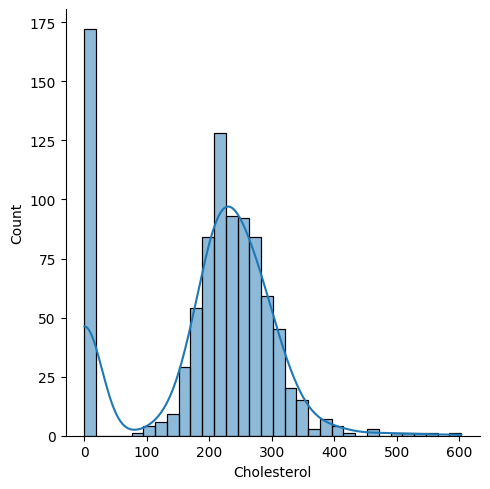

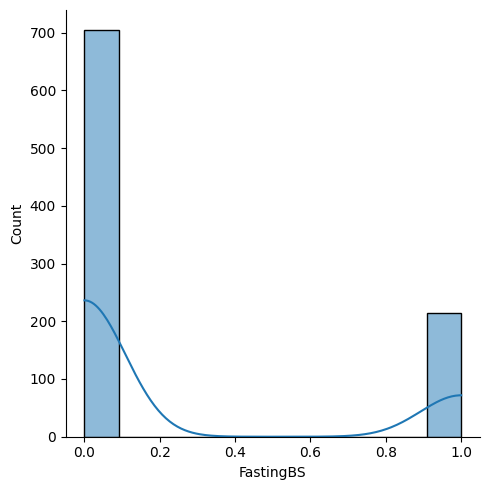

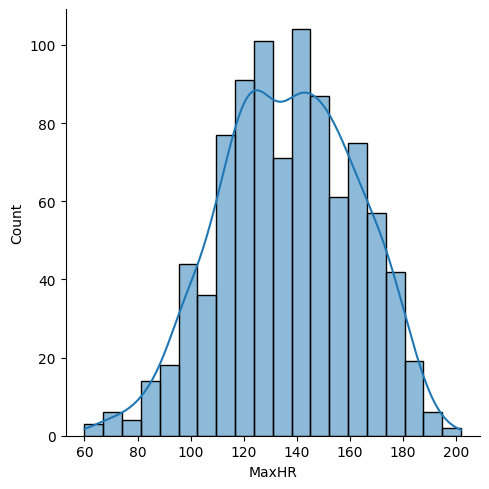

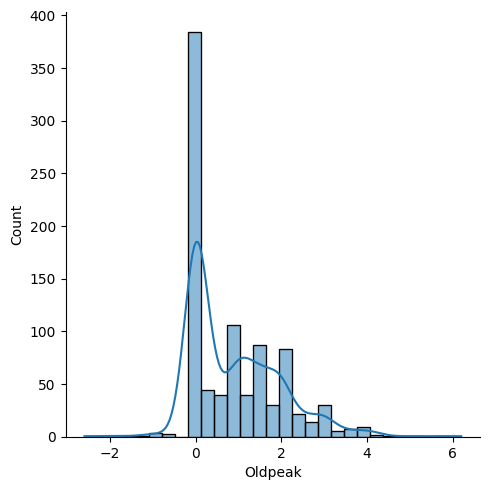

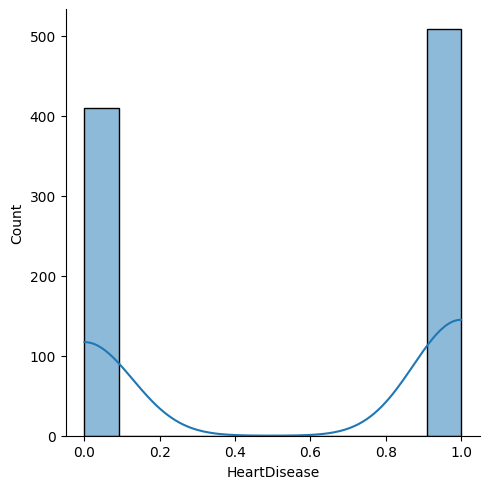

In [5]:
for column in df_numericos.columns:
    sns.displot(df_numericos[column], kde=True)

In [6]:
corr_num = df_numericos.corr()
corr_num

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [7]:
aux_num = []
for i in corr_num.index:
    for j in corr_num.columns:
        if i != j and (corr_num[i][j] < -0.6 or corr_num[i][j] > 0.6):
                if((i,j,corr_num[i][j]) not in aux_num and (j,i,corr_num[i][j]) not in aux_num): # eliminamos duplicados
                    aux_num.append((i, j, corr_num[i][j]))

print("Variables con fuerte ( > 0.6 o < -0.6 ) relación:")

aux_num

Variables con fuerte ( > 0.6 o < -0.6 ) relación:


[]

Podemos ver que las variables numéricas no tienen relación entre ellas, no se afectan unas a las otras.

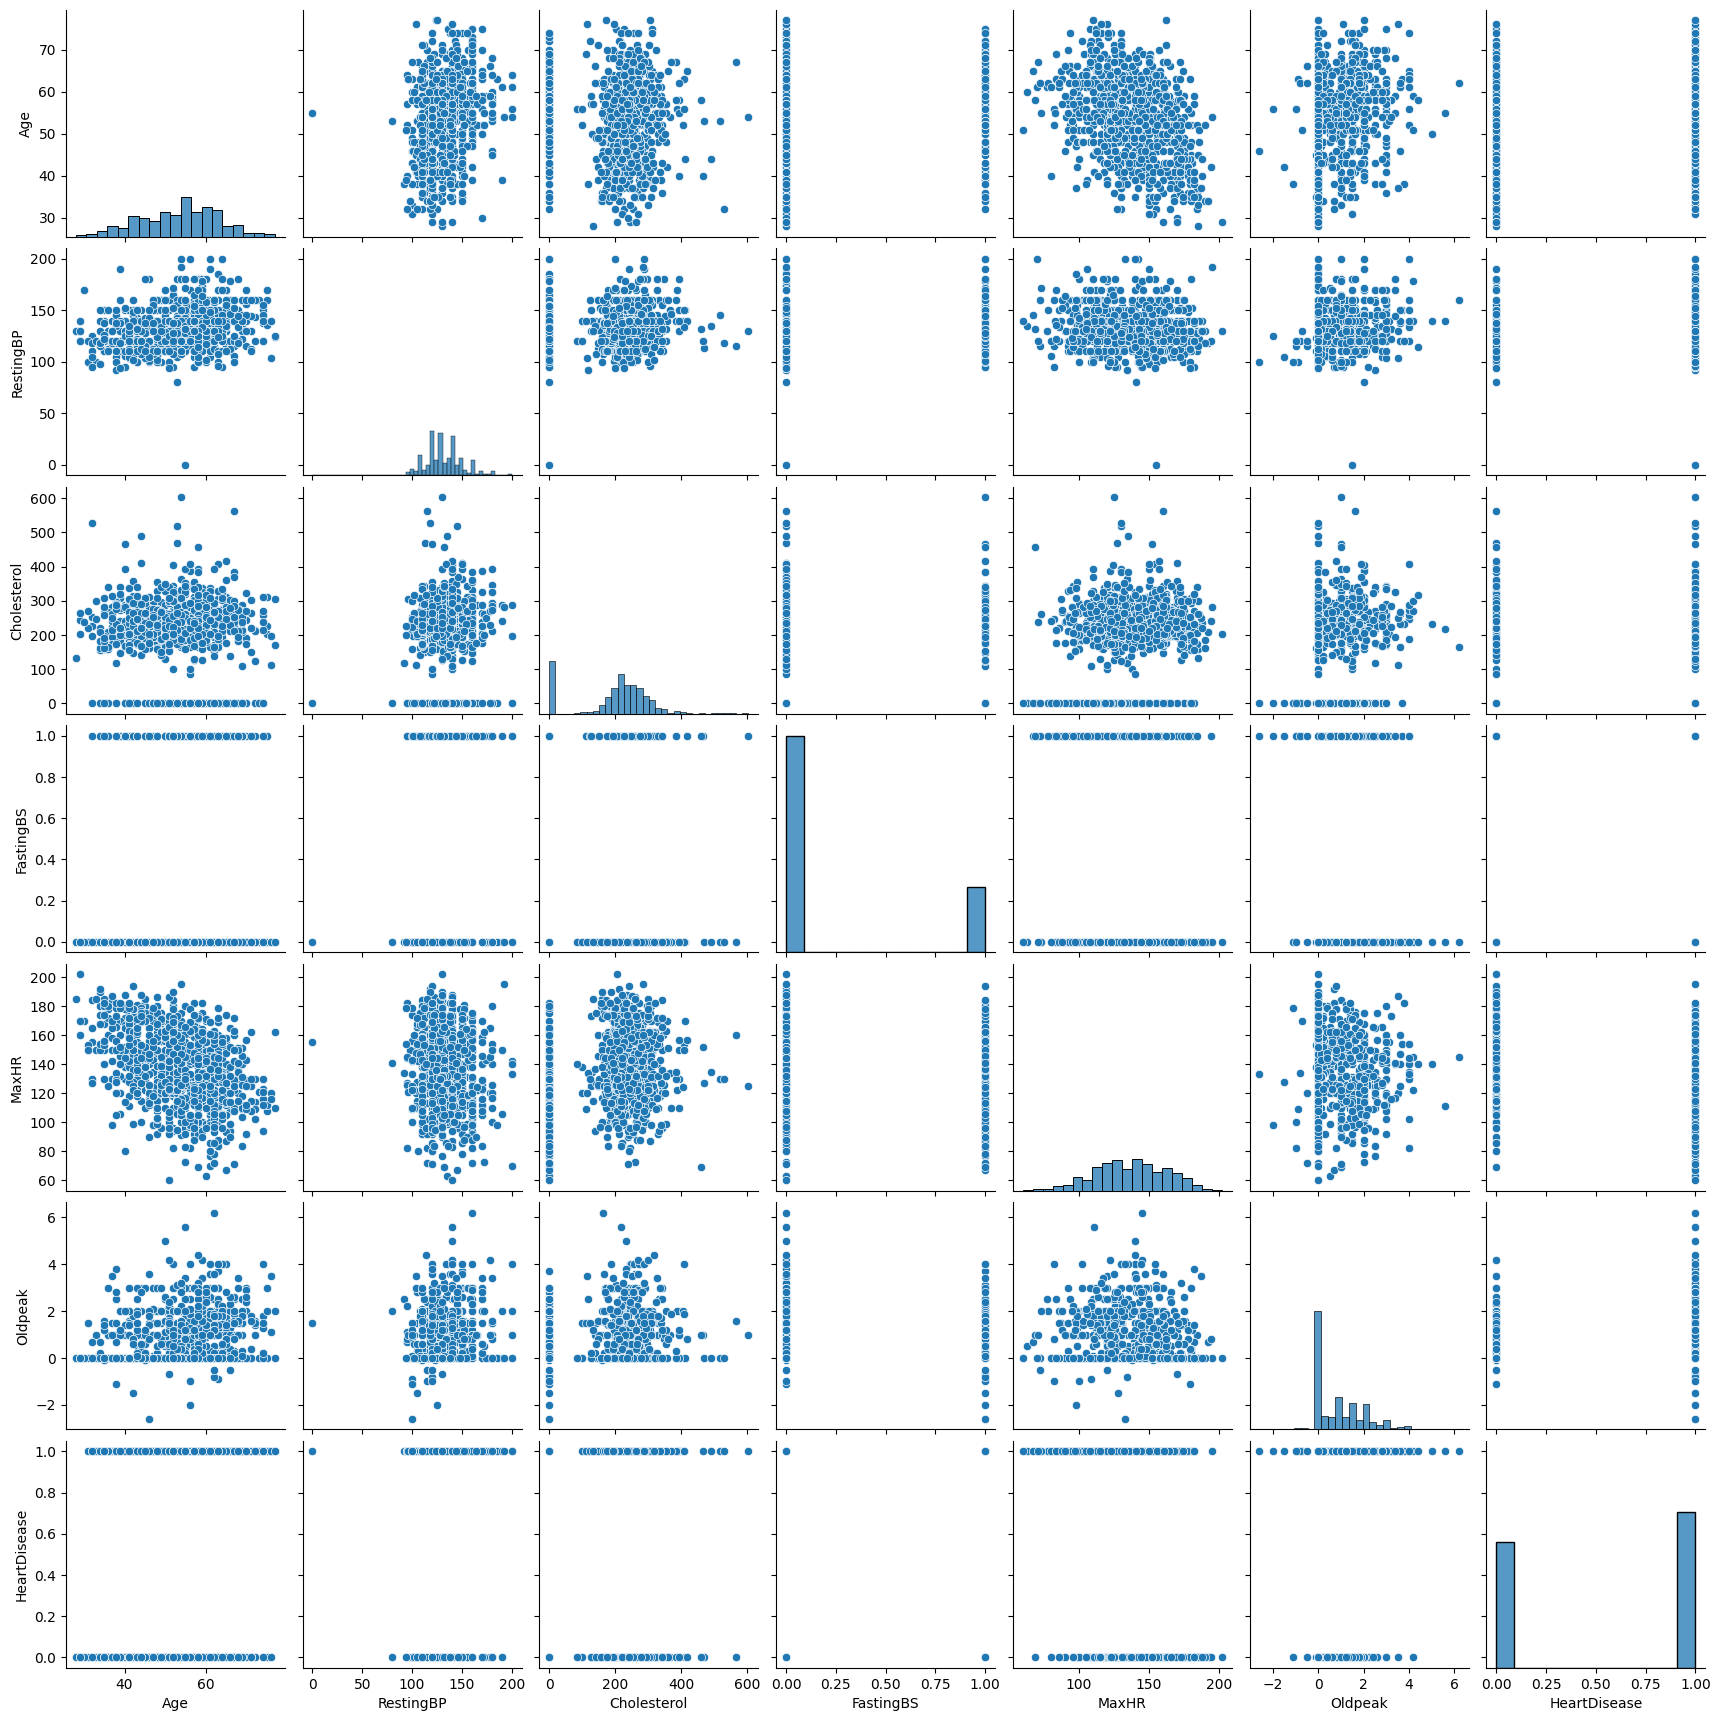

In [8]:
sns.pairplot(df_numericos)

En el gráfico de arriba, se ve todavía más claro que las variables no tienen relación entre ellas.

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [9]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


<Axes: xlabel='Sex', ylabel='count'>

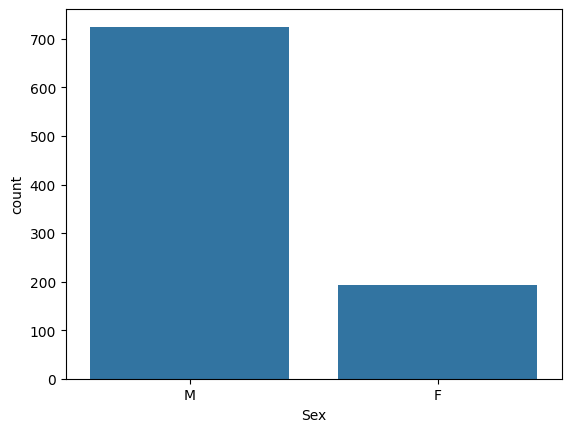

In [10]:
sns.countplot(x="Sex", data=df_categorical)

<Axes: xlabel='ChestPainType', ylabel='count'>

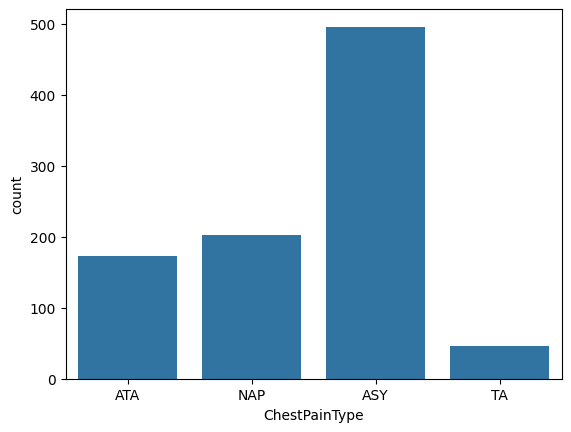

In [11]:
sns.countplot(x="ChestPainType", data=df_categorical)

<Axes: xlabel='RestingECG', ylabel='count'>

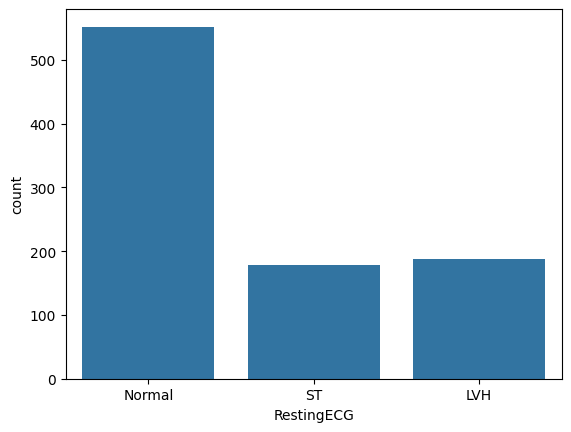

In [12]:
sns.countplot(x="RestingECG", data=df_categorical)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

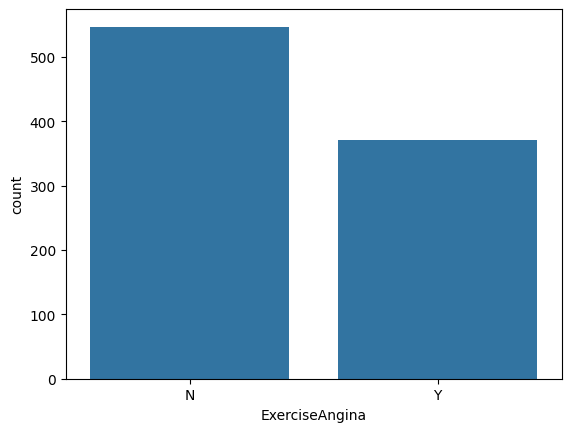

In [13]:
sns.countplot(x="ExerciseAngina", data=df_categorical)

<Axes: xlabel='ST_Slope', ylabel='count'>

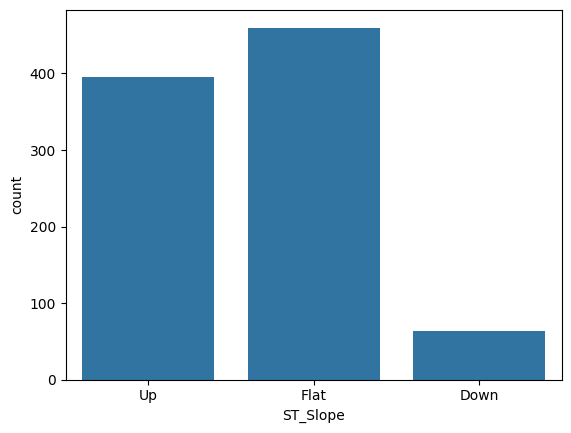

In [14]:
sns.countplot(x="ST_Slope", data=df_categorical)

In [15]:
for column in df_categorical.columns:
    df_categorical[column] = pd.factorize(df_categorical[column])[0]

df_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,0,0,0,0,0
1,1,1,0,0,1
2,0,0,1,0,0
3,1,2,0,1,1
4,0,1,0,0,0


In [16]:
corr_cat = df_categorical.corr()
corr_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
Sex,1.000000,-0.179766,0.018343,-0.190664,-0.150693
ChestPainType,-0.179766,1.000000,0.112067,0.324049,0.352364
RestingECG,0.018343,0.112067,1.000000,0.036119,0.078807
ExerciseAngina,-0.190664,0.324049,0.036119,1.000000,0.428706
ST_Slope,-0.150693,0.352364,0.078807,0.428706,1.000000


## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


In [17]:
# df_prep = df.drop(columns="HeartDisease")
df_prep = df.copy()
for column in df_prep.select_dtypes("object"):
    # if column.dtype == "object":
    df_prep[column] = pd.factorize(df_prep[column])[0]
df_prep.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

In [108]:
from sklearn.model_selection import train_test_split
df_data = df.drop(columns=["HeartDisease"], axis=1)
df_target = df["HeartDisease"].to_numpy()

data_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

for column in df_data.select_dtypes("object"):
    df_data[column] = pd.factorize(df_data[column])[0] #factorizamos los datos categóricos para poder usarlos en el árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=RANDOM_STATE)

El único preprocesado de datos que haremos será convertir los datos categóricos a numéricos para que puedan ser usados dentro del árbol de decisión

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.


In [109]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depth = range(1, 20)
for md in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_data, df_target, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: [0.8137222552415306, 0.8190432761139623, 0.8563286302777623, 0.8736360016512907, 0.8917914162160262, 0.9120065524621506, 0.9327030223890429, 0.9542475355071423, 0.9710721092896815, 0.9818450246083309, 0.9876546987126373, 0.9922540118459615, 0.9947956527722068, 0.9975791316670131, 0.9987896390290174, 0.9993948195145087, 1.0, 1.0, 1.0]
Test accuracy: [0.8134615384615385, 0.801505016722408, 0.8221691352126135, 0.8189799331103679, 0.8233277591973245, 0.8145962732919255, 0.8004777830864788, 0.7852484472049689, 0.7939918776875299, 0.793967988533206, 0.7885212613473482, 0.7895843287147636, 0.7884854276158625, 0.7776158623984711, 0.7776158623984711, 0.7786908743430483, 0.7754300047778309, 0.7754300047778309, 0.7754300047778309]


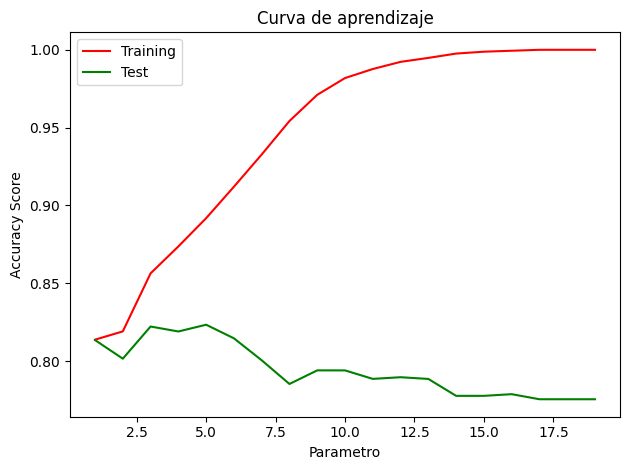

In [110]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depth, train_accuracy, color="r",  label="Training")
plt.plot(max_depth, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

5 de profundidad máxima nos da el mejor valor de aprendizaje en test y en train.

### 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [119]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df_data, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8334133839629274
Exhaustividad ponderada media:  0.8233277591973245
F1 ponderado media:  0.8220082098809434


In [111]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
predictions = cross_val_predict(clf, df_data, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target ,predictions, target_names=['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       410
           1       0.84      0.84      0.84       508

    accuracy                           0.82       918
   macro avg       0.82      0.82      0.82       918
weighted avg       0.82      0.82      0.82       918



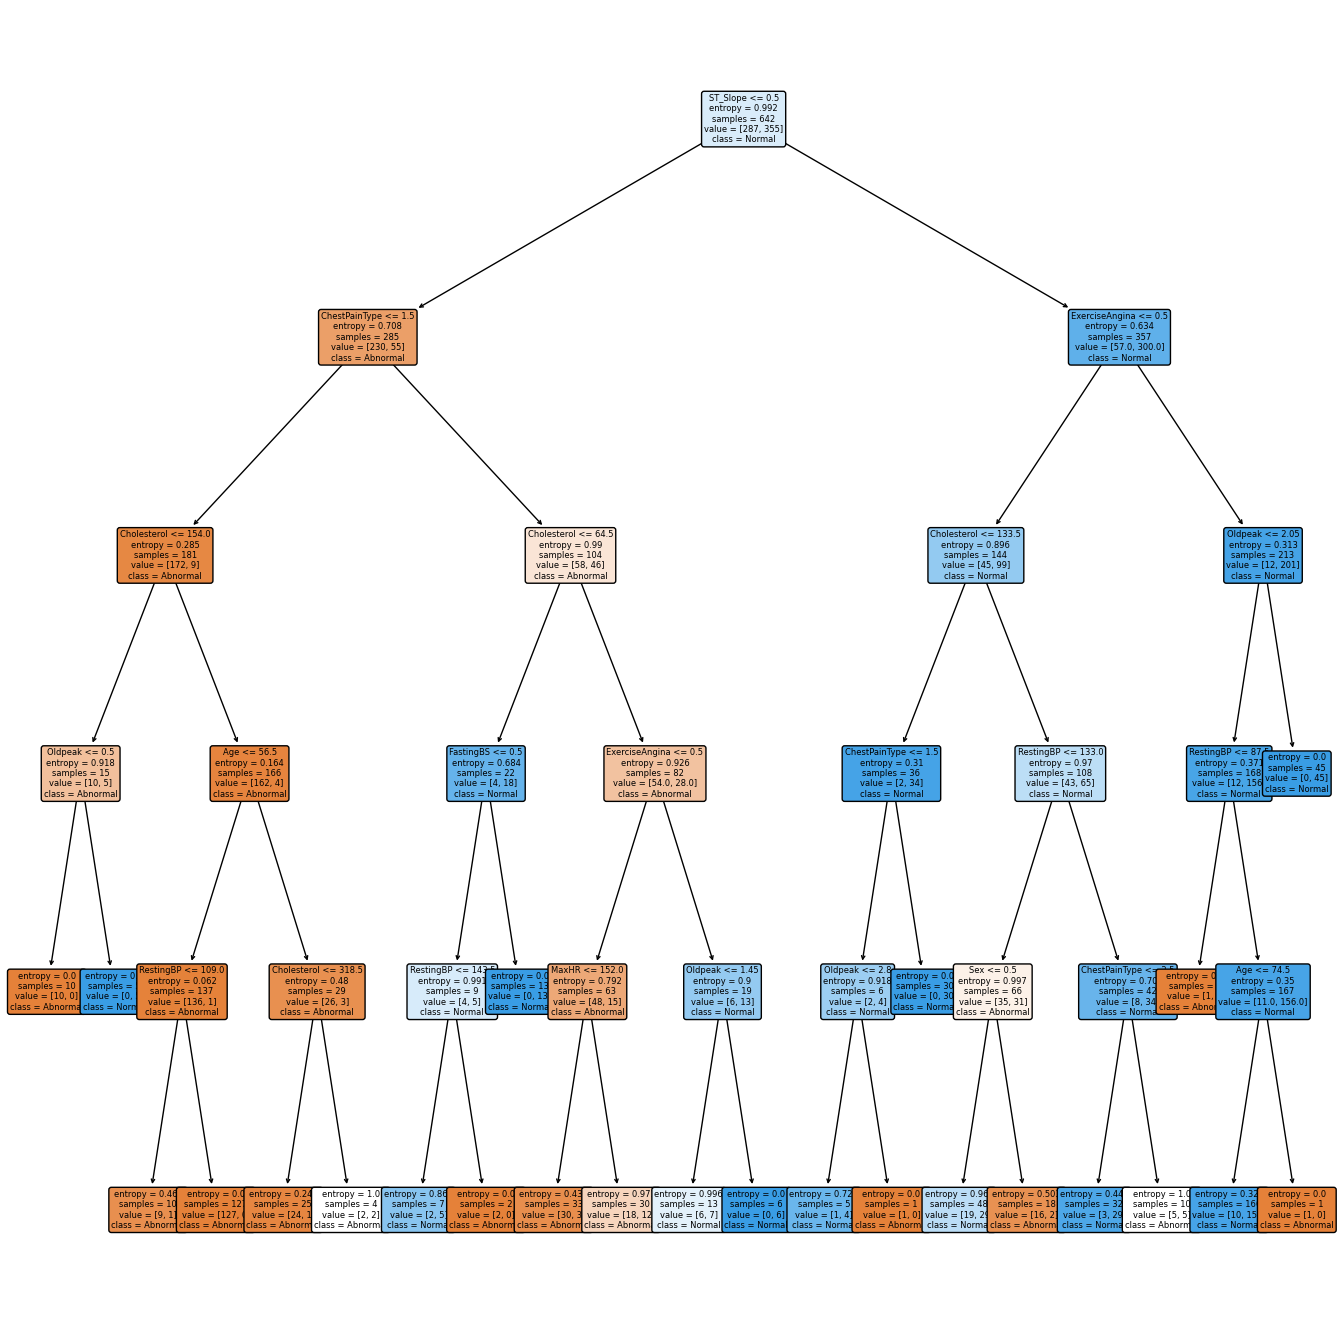

In [114]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17,17))
plot_tree(clf, filled=True,feature_names =data_cols ,class_names=["Abnormal", "Normal"], rounded=True, fontsize=6)
plt.show()

<Axes: >

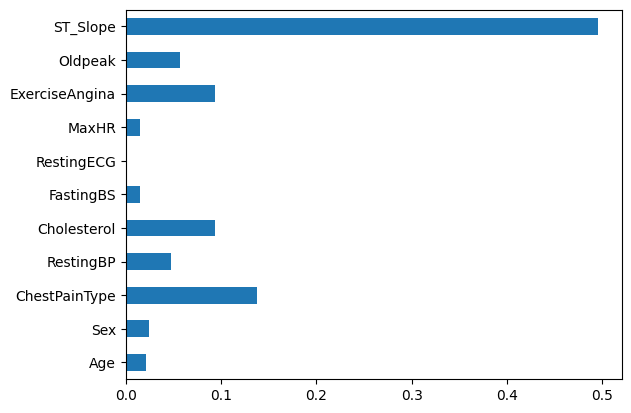

In [112]:
importances = pd.Series(clf.feature_importances_, index=data_cols)
importances.plot(kind='barh')

Vemos que las variables más importantes son ST_Slope, ExerciseAngina y ChestPainType

In [116]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.79756098 0.20243902]
 [0.15551181 0.84448819]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

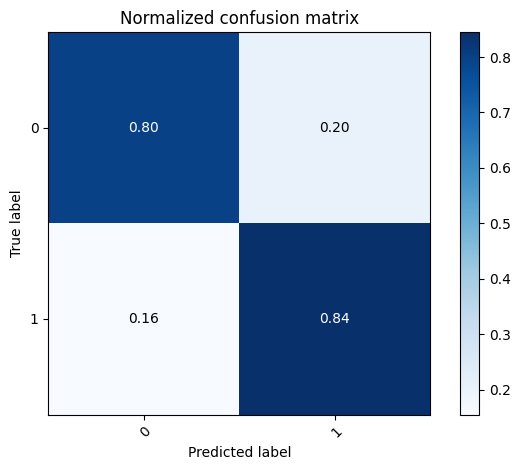

In [117]:
plot_confusion_matrix(df_target, predictions, classes=["0", "1"], normalize=True, title='Normalized confusion matrix')

¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Aunque no es un gran clasificador, nos presenta un 80% de acierto en el peor de los casos.

¿Cómo se comporta nuestro clasificador en cada una de las clases?

El clasificador responde mejor a la clase 1 que a la clase 0.

¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? 

No me parece excesivamente fiable ya que un 20% de tasa de error en el peor de los casos me parece demasiado. Esto en una empresa real podría dar lugar a muchos problemas, más aún tratándose de enfermedades cardíacas.

## 5) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

## 6) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.